In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
#plt.gray()


uint8
(4032, 3024, 3)


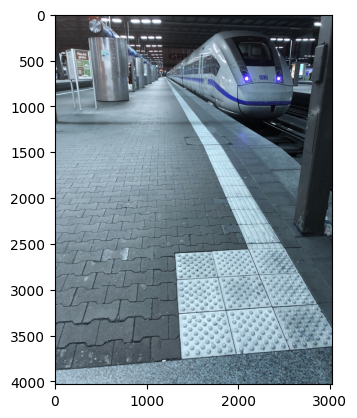

In [7]:
image_path = 'C:\\Users\\leonh\\Documents\\GitHub\\project_bums\\Test_Bilder\\MUC_BHF_3.jpg'
img = cv2.imread(image_path)
plt.imshow(img)

print(img.dtype)
print(img.shape)

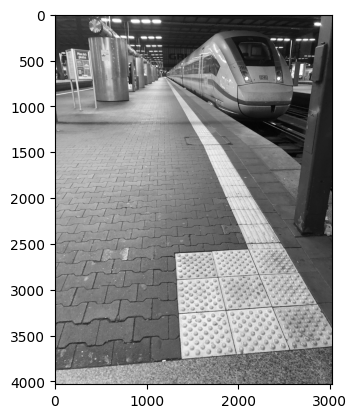

In [9]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.gray()

plt.imshow(gray_image)

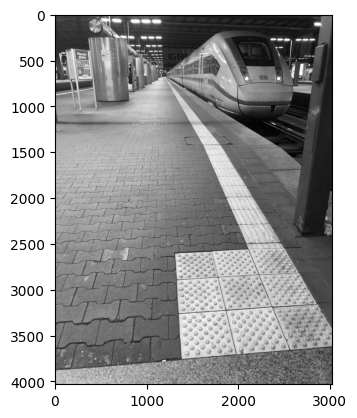

In [10]:
img_blur = cv2.GaussianBlur(gray_image, (5,5), 0)
plt.imshow(img_blur)



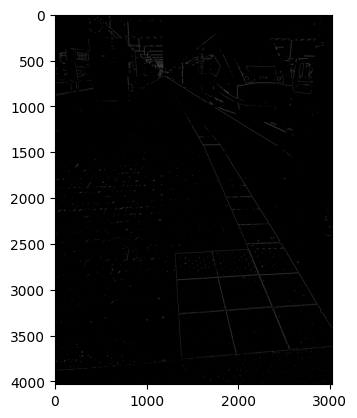

In [11]:
canny = cv2.Canny(img_blur, threshold1=255, threshold2=255)

plt.imshow(canny)

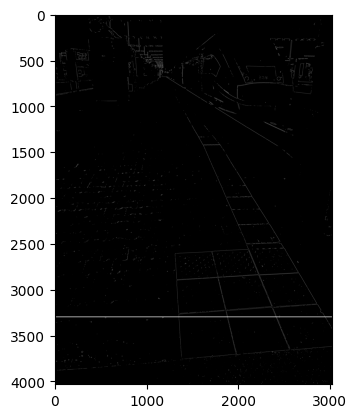

In [38]:
def create_horizontal_line(image, y_position, color=(255, 0, 0), thickness=5):
    line_image = np.array(image)
    cv2.line(line_image, (0, y_position), (image.shape[1], y_position), color, thickness)
    return line_image


y_position = 3300  # Y-Position der horizontalen Linie

line_image = create_horizontal_line(canny, y_position)

plt.imshow (line_image)

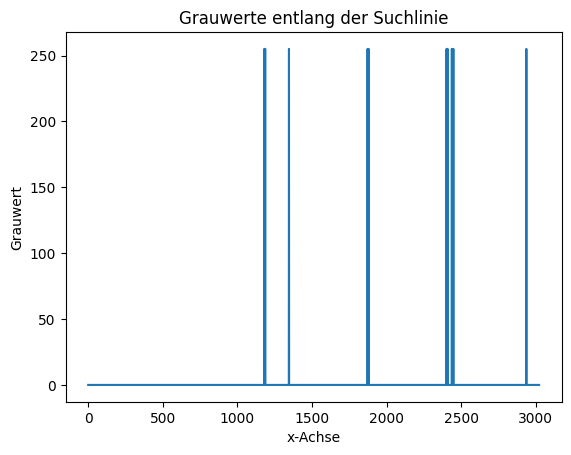

In [39]:
def grayscale_values(image, y_position):
    # Linienbild erstellen
    line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    return gray_values, x_values


# Plot erstellen
def plot_values (gray_values, x_values):
    plt.plot(x_values, gray_values)
    plt.title('Grauwerte entlang der Suchlinie')
    plt.xlabel('x-Achse')
    plt.ylabel('Grauwert')
    plt.show()

gray_values, x_values = grayscale_values(canny, y_position);
plot_values (gray_values, x_values)

Positionen der Änderungen:  [((2197, 1300), (2198, 1300)), ((1539, 1301), (1540, 1301), (2198, 1301), (2199, 1301), (2200, 1301)), ((2200, 1302), (2201, 1302)), ((1540, 1303), (1541, 1303), (2201, 1303), (2202, 1303), (2203, 1303)), ((1541, 1304), (1542, 1304), (2203, 1304), (2204, 1304), (2205, 1304)), ((2205, 1305), (2206, 1305)), ((2206, 1306), (2207, 1306), (2208, 1306)), ((1542, 1307), (1543, 1307), (2208, 1307), (2209, 1307), (2210, 1307)), ((1543, 1308), (1544, 1308), (2210, 1308), (2211, 1308), (2565, 1308)), ((2211, 1309), (2212, 1309), (2213, 1309), (2566, 1309)), ((1544, 1310), (1545, 1310), (2213, 1310), (2214, 1310), (2215, 1310)), ((2215, 1311), (2216, 1311)), ((1545, 1312), (1546, 1312), (2216, 1312), (2217, 1312), (2218, 1312)), ((1546, 1313), (1547, 1313), (2218, 1313), (2219, 1313)), ((2219, 1314), (2220, 1314), (2221, 1314)), ((1547, 1315), (1548, 1315), (2221, 1315), (2222, 1315), (2568, 1315), (2583, 1315)), ((858, 1316), (859, 1316), (2223, 1316), (2224, 1316), (2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


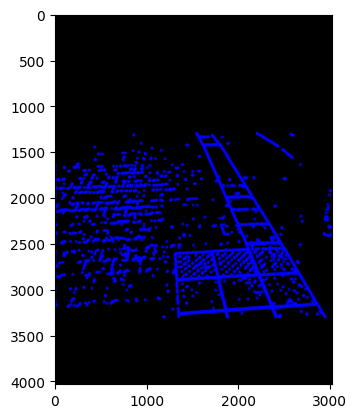

In [42]:

def detect_gray_value_changes(image, image_to_draw, y_position, min_distance, max_distance):
    
    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    # Grauwertänderungen und zugehörige x-Positionen sammeln
    change_positions_inrange = []
    change_positions = []
    #prev_value = gray_values[0]
    prev_position = 0

    for i in range(1, len(gray_values)):
        current_value = int(gray_values[i])
        if current_value == 255:
            if (i - prev_position) < max_distance:  #min_distance <
                change_positions_inrange.append((prev_position, y_position))
                change_positions_inrange.append((i, y_position))

            #change_positions.append((i, y_position))
            #prev_value = current_value
            prev_position = i  

    change_positions_sub =  tuple(set(change_positions_inrange))
    change_positions_sub = sorted(change_positions_sub, key=lambda point: point[0])

    # Nun nahe beiananderliegenede Punkte aus changes_position entfernen
    change_positions_wrong = []
    prev_x = 0
    for p in range(len(change_positions_sub)):
        current_x = change_positions_sub[p][0]
        current_y = change_positions_sub[p][1]
        
        if min_distance < (current_x-prev_x) < min_distance:
            #change_positions_wrong.append((prev_x, current_y))
            change_positions_wrong.append((current_x, current_y))

        prev_x = current_x

    change_positions_final = tuple(filter(lambda x: x not in change_positions_wrong, change_positions_sub))

    #Makiere die zulässigen Grauwertänderungen im ausgabe Bild
    img_out = image_to_draw
    for position in change_positions_final:
        cv2.circle(img_out, position, 10, (0, 0, 255), 10)

    return change_positions_final, change_positions_sub, img_out


#y_position = 2400
y_start = 1300
y_end = 3301
change_positions = []

img_dots = np.zeros(img.shape)

for y in range(y_start, y_end):
#Nach Grauwertänderungen suchen die sich in Ihrer x-Koordinate in einem Abstand 
# von 200 bis 350 Pixel befinden
    change_positions_current, change_positionskleiner, img_dots = detect_gray_value_changes(canny, img_dots, y, 200, 400)
    change_positions.append(change_positions_current)

    

print("Positionen der Änderungen: ", change_positions)
print("...", change_positionskleiner)
plt.imshow(img_dots)


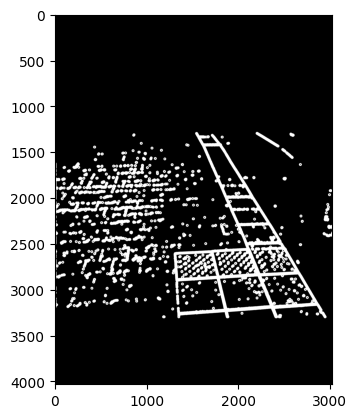

In [47]:
img_dots_gray = cv2.cvtColor(img_dots, cv2.COLOR_BGR2GRAY)
if img_dots_gray.dtype != np.uint8:
    img_dots_gray = img_dots_gray.astype(np.uint8)

plt.imshow(img_dots_gray)

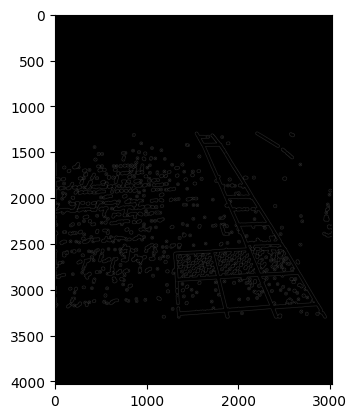

In [51]:
canny_dots = cv2.Canny(img_dots_gray, threshold1=250, threshold2=0)
plt.imshow(canny_dots)

(4032, 3024, 3)

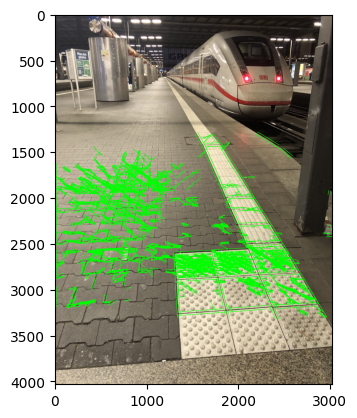

In [55]:
linesh = cv2.HoughLinesP(canny_dots, 1, np.pi/180, 60,
                        minLineLength=50, maxLineGap=50)

lines=np.squeeze(linesh)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_2 = img.copy()
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (0,255,0), 3)
plt.imshow(img_rgb)
img.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


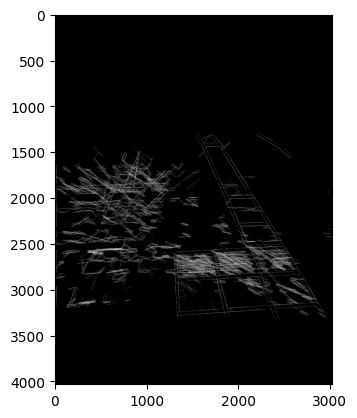

In [58]:
bw = np.zeros(np.shape(img))
for (x1,y1,x2,y2) in lines:
    cv2.line(bw, (x1,y1), (x2,y2), (255,255,255))
plt.imshow(bw)

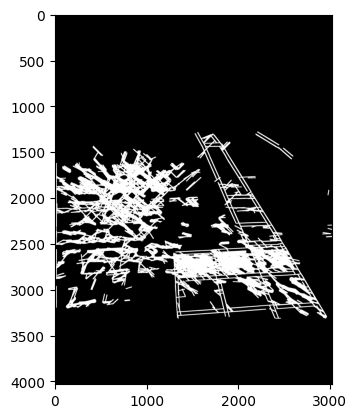

In [60]:
bw_new = cv2.dilate(bw ,np.ones((3,3)), iterations=4)
plt.imshow(bw_new)

In [62]:
bw_new=(255-bw_new)
nr, labels = cv2.connectedComponents(bw_new)
bw_connect = (labels==1) * 1
plt.imshow(bw_connect)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5623: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'cv::connectedComponents_sub1'


In [59]:
bw = bw.astype("uint8")

nr, labels = cv2.connectedComponents(bw)
plt.imshow(labels == 1)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5623: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'cv::connectedComponents_sub1'


[1.6233766233766234, 1.6611295681063123]
[-1404.2207792207791, -1573.089700996678]


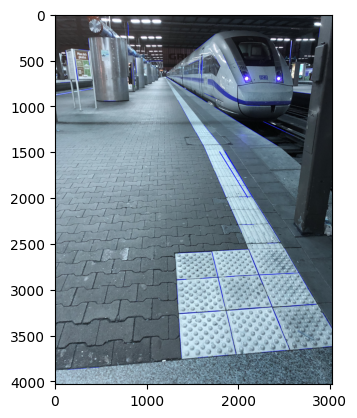

In [75]:
m = []
c = []
for i in range(2):
    out=cv2.line(img, change_positions1[-i], change_positions2[-i], (0, 0, 255), 6)

    #Steigung berechnen
    m.append((change_positions1[i][1]-change_positions2[i][1])/(change_positions1[i][0]-change_positions2[i][0]))
    #y-Schnittpunkt berechnen
    c.append(change_positions1[i][1] -m[i]*change_positions1[i][0])

    # Gerade1: y1 = m[0]*x1 + c[0]
    # Gerade2: y2 = m[1]*x2 + c[1]

print(m)
print(c)
plt.imshow(out)

In [9]:
def set_pixel_to_black(image, x, y):
    image[y, x] = np.zeros(3, dtype='uint8')  # Setze den Pixel auf Schwarz

    return image

set_pixel_to_black(img, 100, 100)

ValueError: setting an array element with a sequence.

In [ ]:
def set_pixels_to_zero(image, slope_left, intercept_left, slope_right, intercept_right, offset=50):
    height, width = image.shape
    
    for y in range(height):
        for x in range(width):
            if y <= (slope_left * x + intercept_left)-offset and y >= (slope_right * x + intercept_right)+offset:
                image[y, x] = [0, 0, 0]  # Setze den Pixel auf Schwarz
    
    return image

blacken_img = set_pixels_to_zero(img, m[0], c[0], m[1], c[1])

plt.imshow(blacken_img)

ValueError: setting an array element with a sequence.